# 0. Setup: imports and plotting defaults

In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['grid.linestyle'] = ':'
sns.set_style('whitegrid')

## Paths and instructions

In [62]:
RAW_DIR = 'data/raw'
RAW_FILE = 'cs-training.csv'    

In [63]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

RAW_DIR = os.path.join(PROJECT_ROOT, "data", "raw")

PROCESSED_DIR = os.path.join(PROJECT_ROOT, "data", "processed")
os.makedirs(PROCESSED_DIR, exist_ok=True)

train_path = os.path.join(RAW_DIR, "cs-training.csv")
test_path = os.path.join(RAW_DIR, "cs-test.csv")

In [64]:
assert os.path.exists(train_path), f"File not found: {train_path} - put raw data in data/raw/"

# 1. Load data

In [65]:
df = pd.read_csv(train_path)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

print('Shape:', df.shape)
df.head()

Shape: (150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2. Quick overview: info, describe, missing

In [66]:
print("\nInfo:")
df.info()

print("\nDescribe (numeric):")
df.describe().T


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float6

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


## 3. Target and class balance

In [67]:
print(df['SeriousDlqin2yrs'].value_counts(dropna=False))
print("Default rate:", df['SeriousDlqin2yrs'].mean())

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64
Default rate: 0.06684


## 4. Strange / magic values in late-payment fields

In [68]:
late_cols = [c for c in df.columns if 'NumberOfTime' in c or 'NumberOfTimes90DaysLate' in c]
for c in late_cols:
    print('\nColumn:', c)
    print(df[c].value_counts().head(10))



Column: NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
Name: count, dtype: int64

Column: NumberOfTimes90DaysLate
NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
Name: count, dtype: int64

Column: NumberOfTime60-89DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
Name: count, dtype: int64


Strategy note:
 - Replace these magic values with NaN (treat as missing) or a sentinel before imputation.
 - Another option: replace them with 0 if domain knowledge says so.


In [69]:
# Replace 96 and 98 with np.nan in late-columns, we'll impute later.
df_raw_copy = df.copy()
magic_vals = {96, 98}
for c in late_cols:
    if c in df.columns:
        df[c] = df[c].replace(list(magic_vals), np.nan)

print('\nAfter replace, NA counts for late cols:')
for c in late_cols:
    if c in df.columns:
        print(c, df[c].isna().sum())


After replace, NA counts for late cols:
NumberOfTime30-59DaysPastDueNotWorse 269
NumberOfTimes90DaysLate 269
NumberOfTime60-89DaysPastDueNotWorse 269


## 5. Missing value analysis: overall and by target

In [70]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean().sort_values(ascending=False) * 100).round(2)
print(pd.concat([missing, missing_pct], axis=1).rename(columns={0: 'missing_count', 1: 'missing_pct'}))

                                      missing_count  missing_pct
MonthlyIncome                                 29731        19.82
NumberOfDependents                             3924         2.62
NumberOfTime30-59DaysPastDueNotWorse            269         0.18
NumberOfTimes90DaysLate                         269         0.18
NumberOfTime60-89DaysPastDueNotWorse            269         0.18
SeriousDlqin2yrs                                  0         0.00
RevolvingUtilizationOfUnsecuredLines              0         0.00
age                                               0         0.00
DebtRatio                                         0         0.00
NumberOfOpenCreditLinesAndLoans                   0         0.00
NumberRealEstateLoansOrLines                      0         0.00


In [71]:
# Missingness by target (useful to detect informative missingness)
missing_by_target = df.drop(columns=['SeriousDlqin2yrs']).groupby(df['SeriousDlqin2yrs']).apply(lambda x: x.isna().mean()).T
missing_by_target

SeriousDlqin2yrs,0,1
RevolvingUtilizationOfUnsecuredLines,0.000000,0.000000
age,0.000000,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000872,0.014662
DebtRatio,0.000000,0.000000
MonthlyIncome,0.200480,0.166467
NumberOfOpenCreditLinesAndLoans,0.000000,0.000000
NumberOfTimes90DaysLate,0.000872,0.014662
NumberRealEstateLoansOrLines,0.000000,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0.000872,0.014662
NumberOfDependents,0.026755,0.017854


## 6. Grid of histograms for numeric features (rotated xticks, spacing)

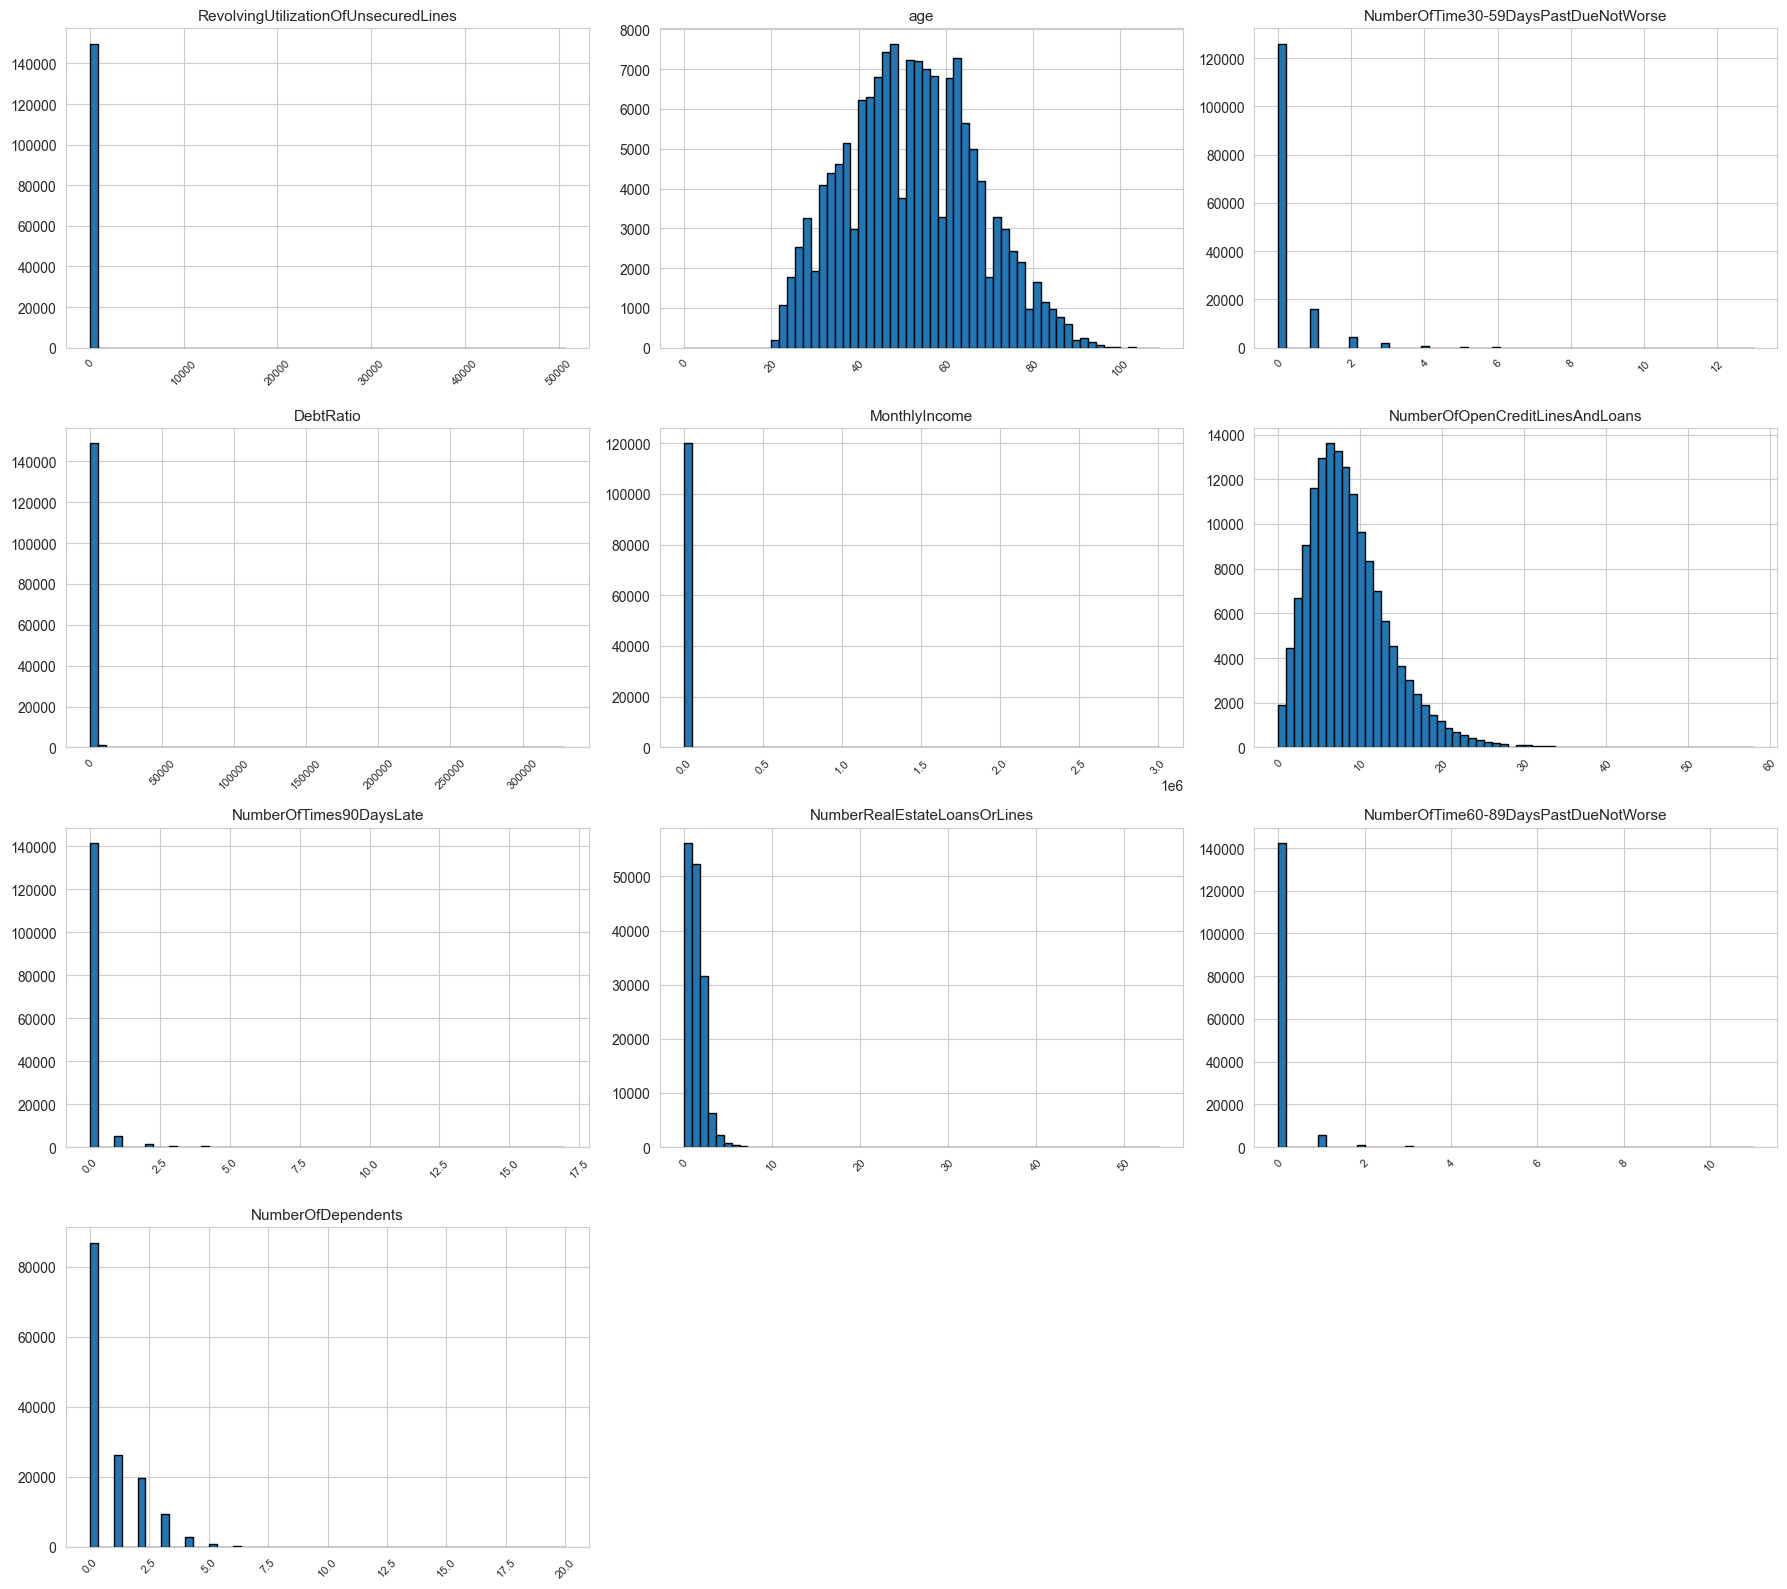

In [72]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'SeriousDlqin2yrs' in num_cols:
    num_cols.remove('SeriousDlqin2yrs')

n = len(num_cols)
cols = 3
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(18, 4*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=60, edgecolor='black')
    axes[i].set_title(col, fontsize=11)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

# remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.tight_layout()
plt.show()

## 7. MonthlyIncome diagnostics (quantiles, top values, plots)


Basic describe:


count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64


Skewness: 114.04031794523321

Quantiles:


0.000          0.0
0.001          0.0
0.010          0.0
0.050       1300.0
0.100       2005.0
0.250       3400.0
0.500       5400.0
0.750       8249.0
0.900      11666.0
0.950      14587.6
0.990      25000.0
0.995      35000.0
1.000    3008750.0
Name: MonthlyIncome, dtype: float64


Count missing: 29731
Count zero: 1634
Count negative: 0

Top 20 largest values:


,MonthlyIncome,age,DebtRatio,NumberOfOpenCreditLinesAndLoans
73763,3008750.0,52,0.001470,10
137140,1794060.0,68,0.002776,15
111365,1560100.0,44,0.004013,12
50640,1072500.0,44,0.004537,9
122543,835040.0,55,0.000147,8
123291,730483.0,67,0.005570,23
93564,702500.0,50,0.008268,12
96549,699530.0,52,0.003698,11
119136,649587.0,49,0.001313,8
37078,629000.0,83,0.000000,3


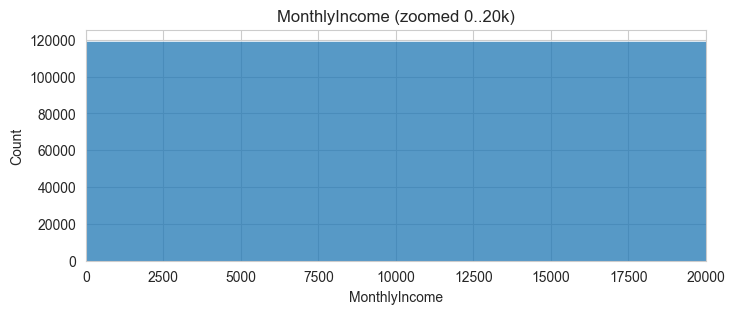

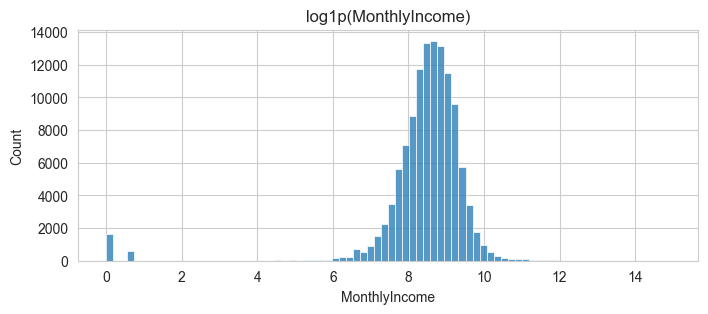

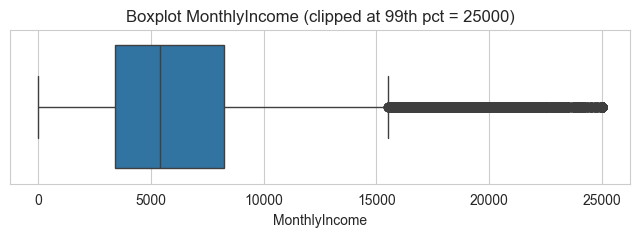

In [73]:
col = 'MonthlyIncome'
if col in df.columns:
    print('\nBasic describe:')
    display(df[col].describe())
    print('\nSkewness:', df[col].skew())

    qs = [0, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 1]
    print('\nQuantiles:')
    display(df[col].quantile(qs))

    print('\nCount missing:', df[col].isna().sum())
    print('Count zero:', (df[col] == 0).sum())
    print('Count negative:', (df[col] < 0).sum())

    print('\nTop 20 largest values:')
    display(df[[col, 'age', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans']].sort_values(col, ascending=False).head(20))

    # Plots: zoomed histogram, log1p
    plt.figure(figsize=(8,3))
    sns.histplot(df[col].dropna(), bins=100)
    plt.xlim(0, 20000)
    plt.title('MonthlyIncome (zoomed 0..20k)')
    plt.show()

    plt.figure(figsize=(8,3))
    sns.histplot(np.log1p(df[col].dropna()), bins=80)
    plt.title('log1p(MonthlyIncome)')
    plt.show()

    # Clip boxplot
    p99 = df[col].quantile(0.99)
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col].clip(upper=p99).dropna())
    plt.title(f'Boxplot MonthlyIncome (clipped at 99th pct = {p99:.0f})')
    plt.show()


## 8. Pairwise correlations (numeric)

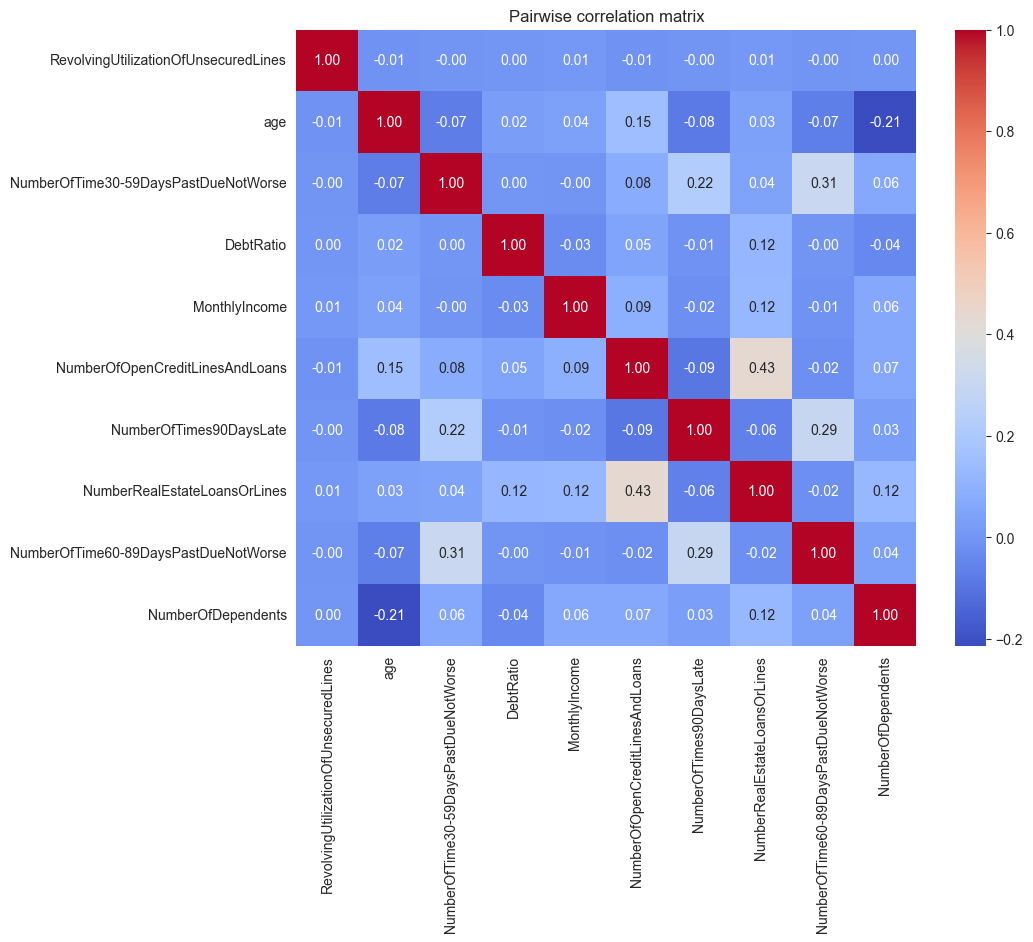

In [74]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pairwise correlation matrix')
plt.show()

## 9. Target rate by age bins and income bins

In [75]:
if 'age' in df.columns:
    df['age_bin'] = pd.cut(df['age'], bins=[0,25,35,45,55,65,75,120], right=False)
    age_table = (
    df.groupby('age_bin', observed=True)['SeriousDlqin2yrs']
      .agg(['count','mean'])
      .sort_values('mean', ascending=False)
)

    display(age_table)

if 'MonthlyIncome' in df.columns:
    df['income_bin'] = pd.qcut(df['MonthlyIncome'].rank(method='first'), q=5, labels=False)
    income_table = df.groupby('income_bin')['SeriousDlqin2yrs'].agg(['count','mean']).sort_values('mean', ascending=False)
    display(income_table)

,count,mean
age_bin,,
"[25, 35)",17165,0.112613
"[0, 25)",2075,0.104578
"[35, 45)",28563,0.090502
"[45, 55)",36776,0.077496
"[55, 65)",34228,0.048469
"[65, 75)",19823,0.027897
"[75, 120)",11370,0.020141


,count,mean
income_bin,,
0.0,24054,0.090463
1.0,24054,0.086472
2.0,24053,0.070137
3.0,24054,0.055334
4.0,24054,0.045024
